In [1]:
import itertools
print = pretty_print

# Problema 5

$$
f(x)=ln(x+1)
$$

In [2]:
def ln_taylor(n):
    taylor = 0
    x = var("x")
    for i in range(n):
        taylor += (-1)**i * x**(i+1) / (i+1)
    return taylor

fn = ln_taylor(8)
print(LatexExpr("(R_nf)(x)="), (fn.subs(x=1) - ln(2)).n().abs())
print(LatexExpr("(T_nf)(x)="), fn.subs(x=1).n())
print(LatexExpr("f(x)="), ln(2).n())

(R_nf)(x)= 0.0586233710361358

(T_nf)(x)= 0.634523809523809

f(x)= 0.693147180559945

$$
f^{(n+1)}(x)=(-1)^nn!(1+x)^{-(n+1)}
$$

$$
(R_nf)(x)=\frac{(-1)^n}{n+1}\left(\frac{x}{1+\theta x}\right)^{n+1},\theta\in(0,1)
$$

$$
|(R_nf)(1)|=\frac{1}{n+1}\left(\frac{1}{1+\theta}\right)^{n+1}\lt\frac{1}{n+1}\lt10^{-5}
$$

In [3]:
def ln_2_rest(n):
    return 1/(n+1)

n = 8
while True:
    rest = ln_2_rest(n)
    if rest < 10**-5:
        break
    n += 1
print(LatexExpr("n="), n)

n= 100000

$$
n>\frac{1}{10^{-5}}-1
$$

In [4]:
n_gt = 1/10**(-5)-1
n = floor(n_gt)+1
print(LatexExpr("n="), n)

n= 100000

$$
\begin{align}
f(x)=\ln\frac{1+x}{1-x}&=\ln{(1+x)}-\ln{(1-x)}=g(x)-h(x) \\
g(x)&=\ln{1+x} \\
h(x)&=\ln{1-x} \\
(T_nf)(x)&=(T_ng)(x)-(T_nh)(x) \\
\end{align}
$$

$$
\begin{align}
h^{(n+1)}(x)&=(-1)n!(1-x)^{-(n+1)} \\
(T_nh)(x)&=-x-\frac{x^2}{2}-\frac{x^3}{3}-\dots-\frac{x^n}{n}+(R_nh)(x) \\
\end{align}
$$

$$
\left(\ln\frac{1+x}{1-x}\right)^{(n)}=n!\left(\left(\frac{1}{1-x}\right)^{n+1}-\left(\frac{-1}{1+x}\right)^{n+1}\right)
$$

In [5]:
def ln_frac_taylor(n):
    taylor = 0
    x = var("x")
    for i in range(n):
        taylor += (-1)**i * x**(i+1) / (i+1)
        taylor -= (-1) * x**(i+1) / (i+1)
    return taylor

fn = ln_frac_taylor(8)
print(fn)
print(LatexExpr("(R_nf)(x)="), (fn.subs(x=1) - ln(2)).n().abs())
print(LatexExpr("(T_nf)(x)="), fn.subs(x=1).n())
print(LatexExpr("f(x)="), ln(2).n())

2/7*x^7 + 2/5*x^5 + 2/3*x^3 + 2*x

(R_nf)(x)= 2.65923377182101

(T_nf)(x)= 3.35238095238095

f(x)= 0.693147180559945

In [6]:
def ln_frac_taylor_rest(n):
    return 2 / (n+2)

n = 8
while True:
    rest = ln_frac_taylor_rest(n)
    if rest < 10**-5:
        break
    n += 1
print(LatexExpr("n="), n)

n= 199999

# Problema 7

- $e^x$ aproximeaza multumitor
- $\ln(1+x)$ nu aproximeaza multumitor

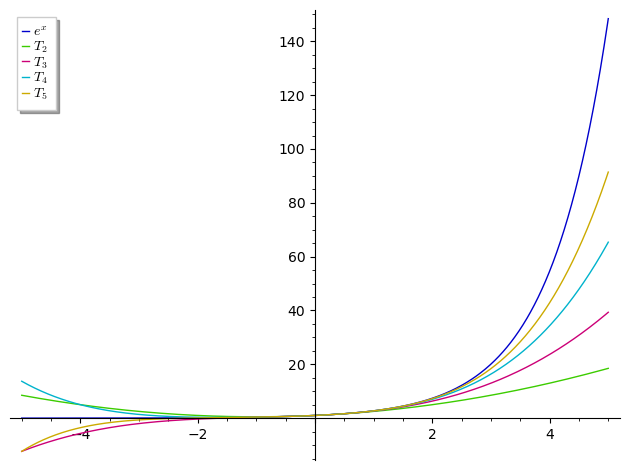

verbose 0 (3897: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 80 points.
verbose 0 (3897: plot.py, generate_plot_points) Last error message: 'Unable to compute f(-1.0079148869820405)'


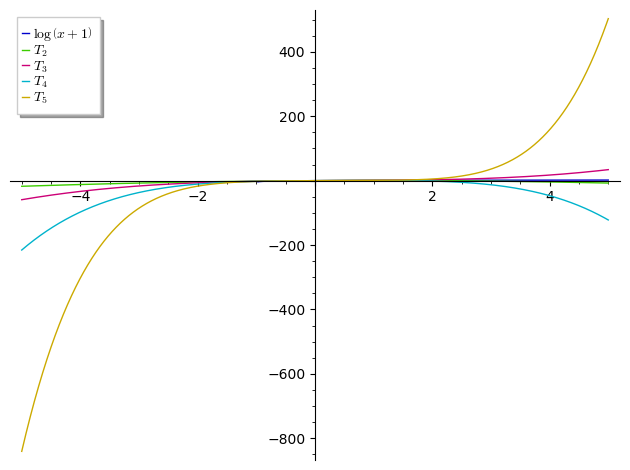

In [7]:
def compute_maclaurin(x, f, n):
    maclaurin = 0
    for i in range(n+1):
        fd = derivative(f, i)
        maclaurin += fd.subs(**{str(x): 0}) / factorial(i) * x**i
    return maclaurin

# e^x
x = var("x")
f = e^x
indices = list(range(2, 5+1))
p = plot(
    [f] + [compute_maclaurin(x, f, i) for i in indices],
    xmin=-5, xmax=5,
    # xmin=-1, xmax=1,
    legend_label=[f"${latex(f)}$"] + [f"$T_{i}$" for i in indices],
)
p.show()

# ln(1+x)
x = var("x")
f = ln(1+x)
indices = list(range(2, 5+1))
p = plot(
    [f] + [compute_maclaurin(x, f, i) for i in indices],
    xmin=-5, xmax=5,
    # xmin=-1, xmax=1,
    legend_label=[f"${latex(f)}$"] + [f"$T_{i}$" for i in indices],
)
p.show()

# Problema 8

f = cos \
k = m = 2

In [8]:
def compute_pade(x, f, k, m):
    def c(i):
        if i < 0:
            return 0
        else:
            return derivative(f, i).subs(**{str(x): 0}) / factorial(i)
    mat = Matrix([
        [
            c(m+i-j)
            for j in range(k)
        ]
        for i in range(k)
    ])
    vec = vector([
        -c(m+i+1)
        for i in range(k)
    ])
    b = mat.solve_right(vec)
    b = vector(itertools.chain([1], b))
    
    a = []
    for j in range(m+1):
        ac = 0
        for i in range(0, j+1):
            ac += c(j-i) * b[i]
        a.append(ac)
    a = vector(a)
    
    pade = (
        a.dot_product(vector(x**i for i in range(len(a))))
        /
        b.dot_product(vector(x**i for i in range(len(b))))
    )
    return pade

Se comporta similar cu Maclaurin.

[-(x + 2)/(x - 2), (x^2 + 6*x + 12)/(x^2 - 6*x + 12)]

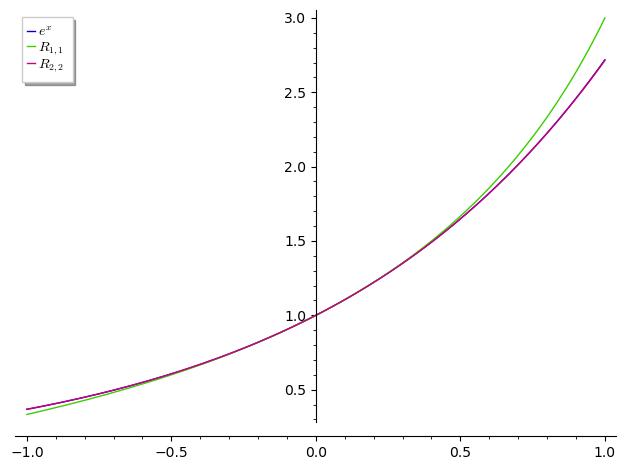

In [9]:
# e^x
x = var("x")
f = e^x
km = [(1, 1), (2, 2)]
pade = [compute_pade(x, f, k, m) for k, m in km]
print(pade)
p = plot(
    [f] + pade,
    xmin=-1, xmax=1,
    legend_label=[f"${latex(f)}$"] + [f"$R_{{{k},{m}}}$" for k, m in km],
)
p.show()

Se comporta mult mai bine decat varianta Maclaurin.

[3*(x^2 + 2*x)/(x^2 + 6*x + 6), 24*x/(x^3 - 2*x^2 + 12*x + 24)]

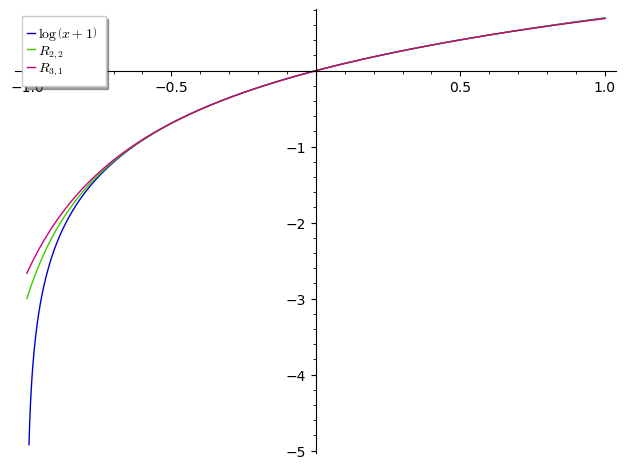

In [10]:
# ln(1+x)
x = var("x")
f = ln(1+x)
km = [(2, 2), (3, 1)]
pade = [compute_pade(x, f, k, m) for k, m in km]
print(pade)
p = plot(
    [f] + pade,
    xmin=-1, xmax=1,
    legend_label=[f"${latex(f)}$"] + [f"$R_{{{k},{m}}}$" for k, m in km],
)
p.show()

[6*x/(x^2 + 6),
 6*x/(x^2 + 6),
 110880*(1074305779*x^5 - 51860335800*x^3 + 407195104680*x)/(62077121*x^10 + 7479608290*x^8 + 611307275040*x^6 + 38652664881600*x^4 + 1774691500982400*x^2 + 45149793206918400)]

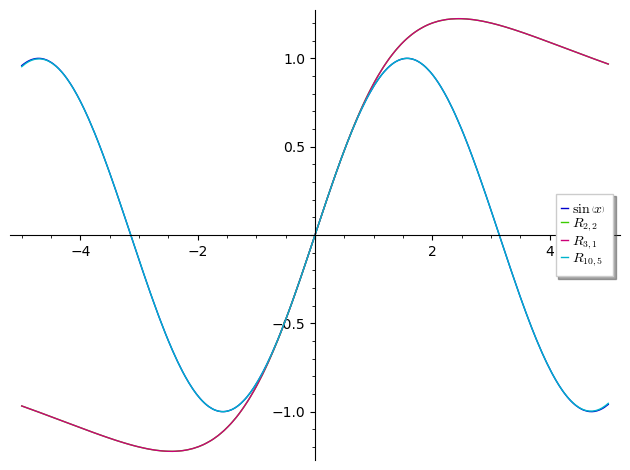

In [13]:
# sin(x)
x = var("x")
f = sin(x)
km = [(2, 2), (3, 1), (10,5)]
pade = [compute_pade(x, f, k, m) for k, m in km]
print(pade)
p = plot(
    [f] + pade,
    xmin=-5, xmax=5,
    legend_label=[f"${latex(f)}$"] + [f"$R_{{{k},{m}}}$" for k, m in km],
)
p.show()